In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
pl = pd.read_csv("player_list.csv")
pl.head()

,Unnamed: 0,구분,이름,출생,포지션,국내입단연도,첫구단활동종료,첫구단활동기간,첫소속구단,해외진출연도,해외 첫 소속팀,국내복귀,복귀 소속팀,연봉(백만원),cnt_golden,cnt_mvp,cnt_all_star,기사량
0,4,메이저리그,김광현,1988,좌완선발,2007.0,2019.0,13.0,SK와이번스,2020,세인트루이스 카디널스,2022,SSG 랜더스,8100.0,1.0,1.0,5.0,249
1,8,메이저리그,김현수,1988,좌익수/1루수,2006.0,2015.0,10.0,두산베어스,2016,볼티모어 오리올스,2018,LG 트윈스,1400.0,3.0,NaN,7.0,284
2,9,메이저리그,류현진,1987,좌완선발,2006.0,2012.0,7.0,한화이글스,2013,LA다저스,2024,한화이글스,2500.0,2.0,2.0,4.0,1637
3,10,메이저리그,박병호,1986,1루수,2005.0,2011.0,7.0,LG트윈스,2016,미네소타 트윈스,2018,넥센히어로즈,1500.0,6.0,2.0,5.0,243
4,12,메이저리그,양현종,1988,좌완투수,2007.0,2020.0,14.0,KIA타이거즈,2021,텍사스 레이져스,2022,KIA 타이거즈,1000.0,1.0,1.0,5.0,319


In [5]:
#글씨 지정
plt.rcParams['font.family'] = 'Malgun Gothic'

In [30]:
# 대상 칼럼 객체 생성
gold = pl.cnt_golden
mvp = pl.cnt_mvp
star = pl.cnt_all_star
name = pl.이름
article = pl.기사량

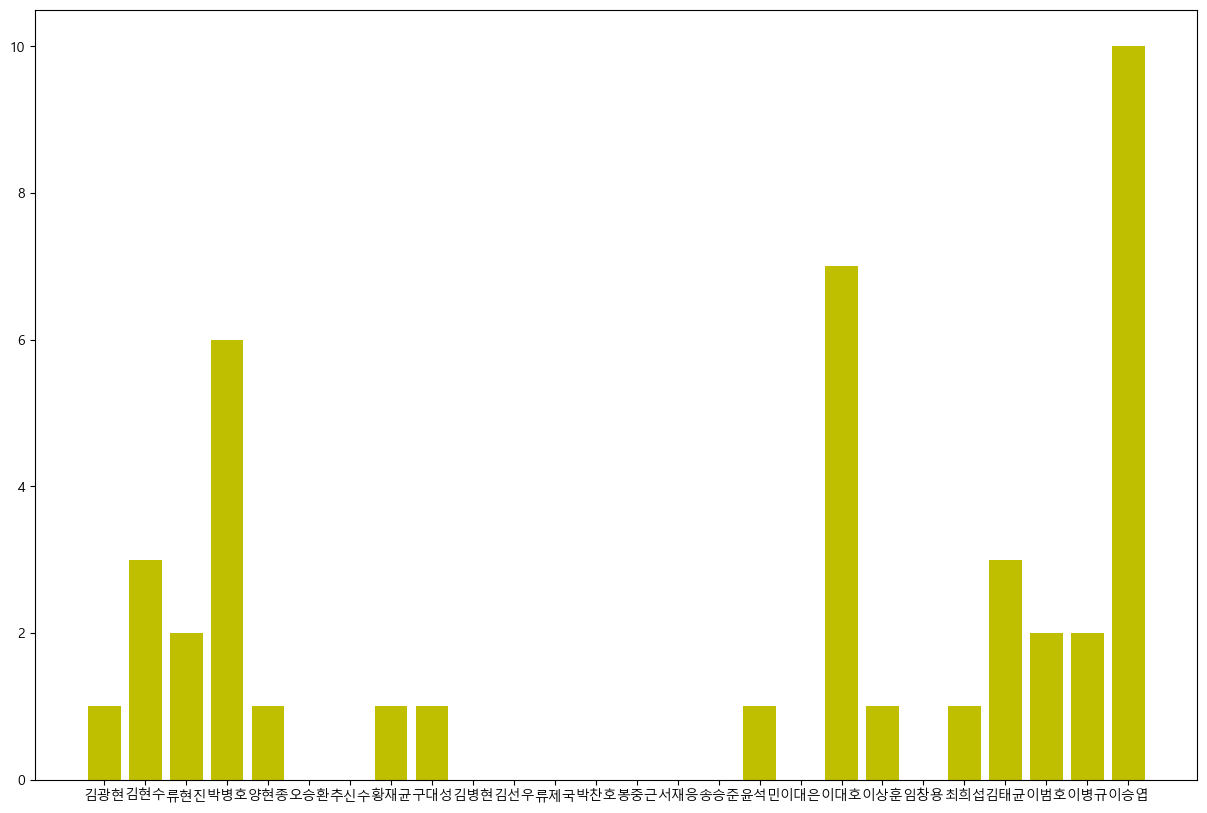

In [24]:
#각 선수별 골든글러브 수상 횟수
plt.figure(figsize=(15, 10))
plt.bar(name, gold, color = 'y')
plt.show()

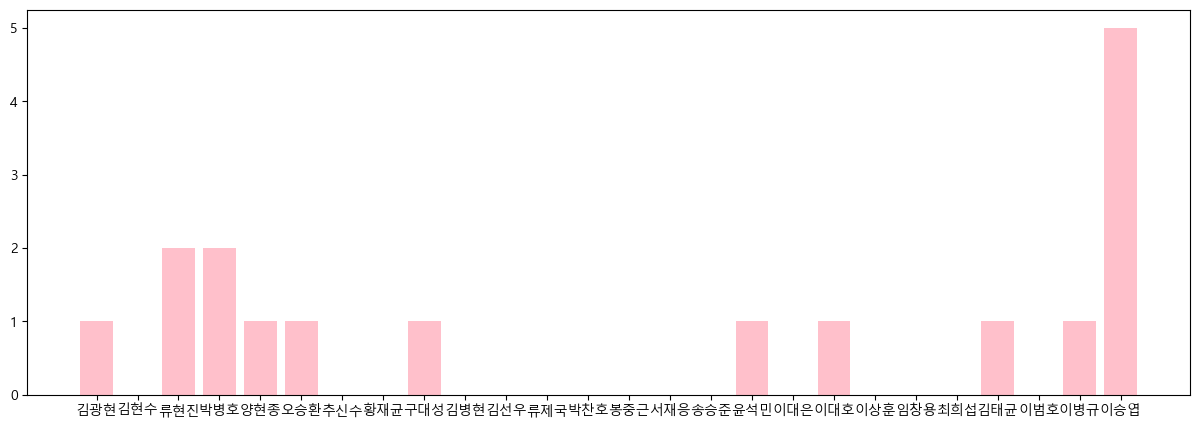

In [25]:
#각 선수별 mvp(정규mvp+신인상) 수상 횟수
plt.figure(figsize=(15, 5))
plt.bar(name, mvp, color = 'pink')
plt.show()

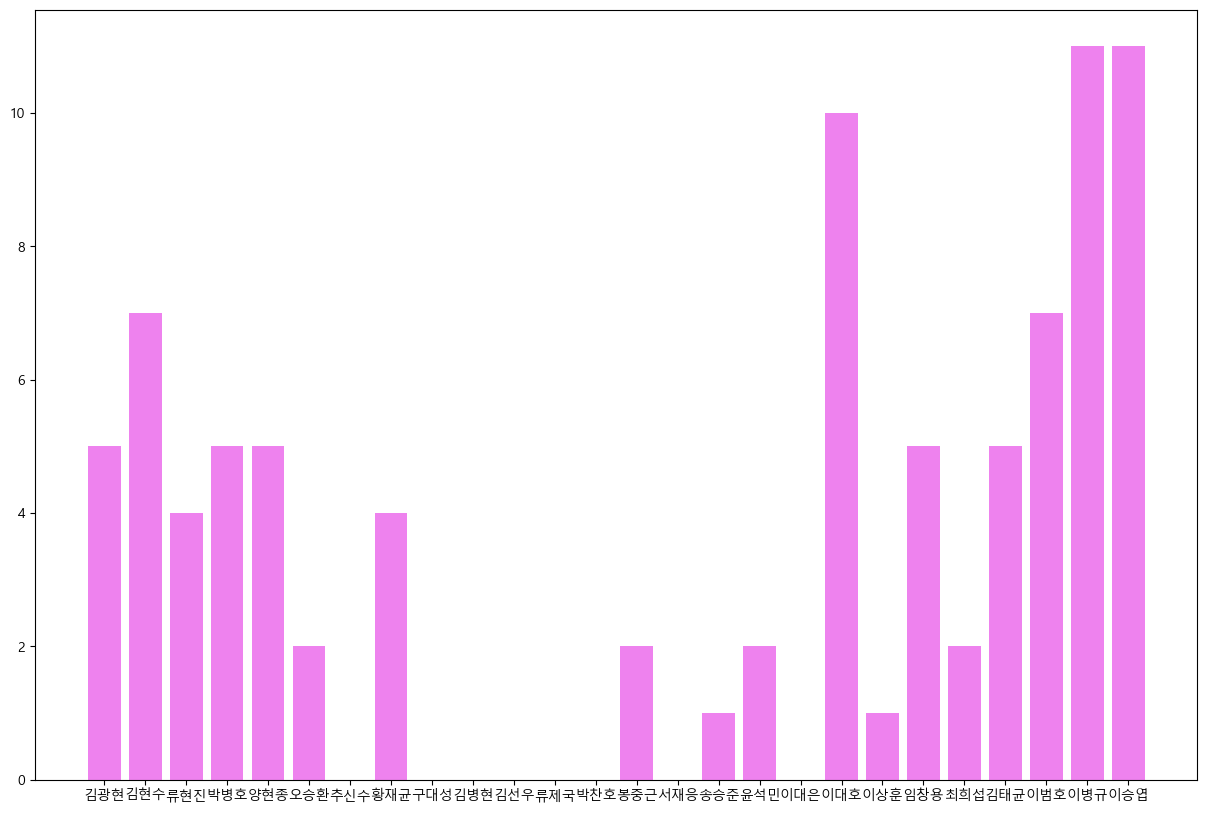

In [26]:
#각 선수별 골든글러브 수상 횟수
plt.figure(figsize=(15, 10))
plt.bar(name, star, color = 'violet')
plt.show()

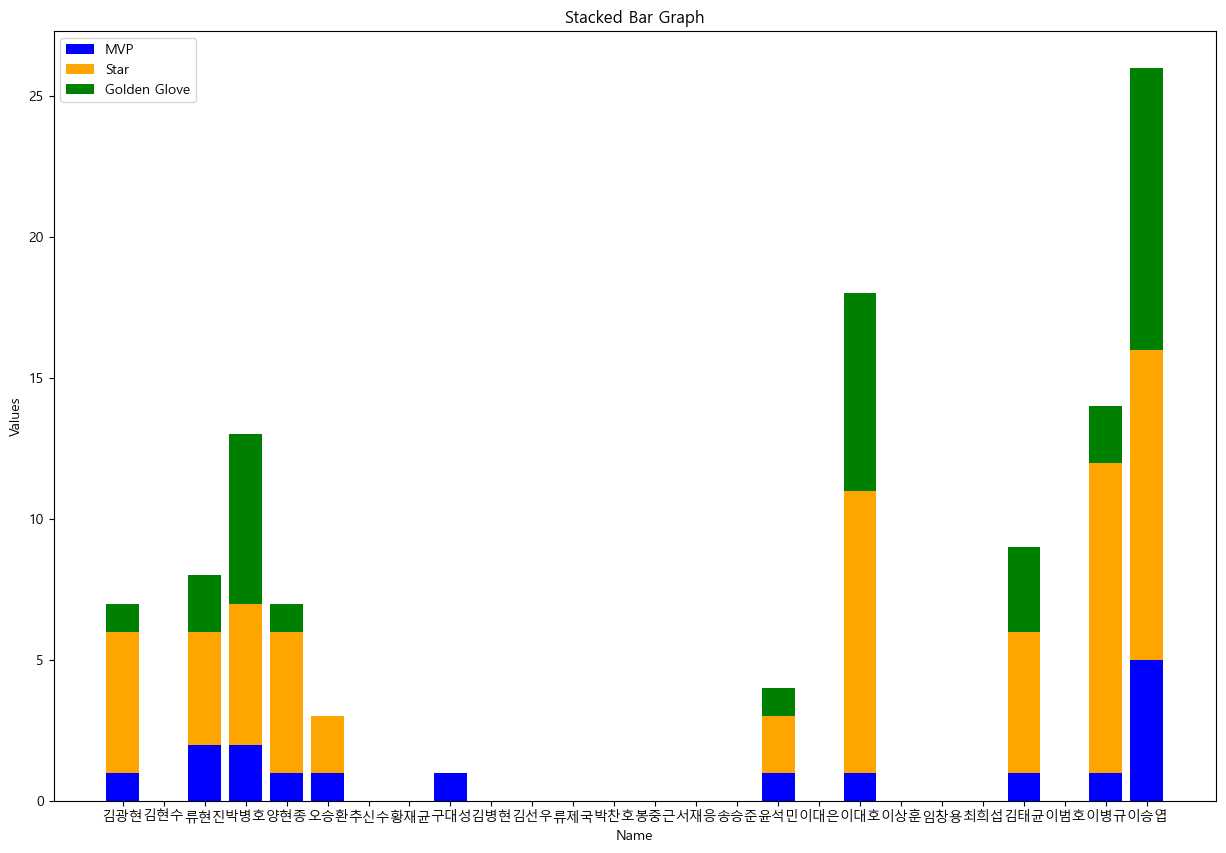

In [29]:
# 그래프 그리기
plt.figure(figsize=(15, 10))
plt.bar(name, mvp, label="MVP", color='blue')
plt.bar(name, star, bottom=mvp, label="Star", color='orange')
plt.bar(name, gold, bottom=mvp + star, label="Golden Glove", color='green')

# 그래프 세부 설정
plt.xlabel("Name")
plt.ylabel("Values")
plt.title("Stacked Bar Graph")
plt.legend()

# 그래프 표시
plt.show()

In [ ]:
Group = 

In [ ]:
# 세 그래프를 하나로 합쳐보기
df_group = df.groupby([''])